# Course: Building Clustering Models with scikit-learn

## Module 2: Building a Simple Clustering Model in scikit-learn

### Unsupervised Learning
#### Use-cases
- Make unlabelled data self-sufficinet
    - Identify photos of a specific individual
- Latent factor analysis
    - Find common drivers of 200 stocks
- Clustering
    - Find releveant document in a corpus
- Anomoly Detection
    - Flag fraudilent credit card transactions
- Quantization
    - Compress true color 24 bit to 8 bit
- Pretraining for Supervised Learning Problems

#### Techniques
- Clustering: Indetify patterns in data items
- Autoencoding: Identify latent factors in underlying data

#### Terms
Hypercube (N-dimensional)

### Clustering
Objective is:
- To maximize intra-cluster similiarity
- To minimize inter-cluster similiarity

#### K-means Clustering
- Initialize K centroids in the data (pick at random or use algorithm)
    - Centroid is a mean, can also be referred to as a "reference vector"?
- Iterate through data points, assigning each to a cluster 
    - Measure distance between point and centroids (often via euclidean distance)
    - Points closest to a centroid will be assigned to the cluster represented by that centroid
- Iterate through the following process until the means no longer move (reaches convergence):
    - Recalculate the mean (centroid) for each cluster (average all of the data points belonging to that cluster)
    - Reassign the points to clusters closest to those points

#### Hyperparameters
- Number of clusters (K)
- Initial value of centroids (coordinates)
- Distance measure (e.g., euclidean)
- Coordinate update method (e.g., simple averaging)

#### Evaluation Scoring
All required labelled data other than **Silhouette**:
- Homogeneity (each cluster should contain members of the same class)
- Completeness (all members of a call should lie in the same cluster)
- V-measure (the harmonic mean of Homogeneity and Completeness)
- Adjusted Rand Index (ARI)
- Adjusted Mutual Info
- Silhouette

#### Homogeneity, Completeness, and V-measure
Related set of metrics, each bounded between 0 and 1 where higher is better. Requires labelled data.
- Homogeneity and Completeness are inversely related, similiar to precision and recall
- Need a third metric to the optimize the tradeoff between the two, **V-measure**
    - V-measure is often closer to the lower of the two (Homogeneity and Completeness) but favors an even weightage of both
    - V-measure = $ 2 x \dfrac{(Homogeneity x Completeness)}{(Homogeneity x Completeness)} $
    
#### Adjusted Rand Index (ARI)
Measure similarity between the original labels assigned to the data and the clusters to which the data points have been grouped.
- Requires labelled data
- Adjusted for the probability of correct labelling purely by chance
- -1 to 1 where 1 indicates the clusters agree perfectly and 0 or negative values are bad (clusters have no relationship)

#### Adjusted Mutual Info
Measures mutual information in overlap between cluster assignments. Shows how well you can predict one label by seeing variations in another.
- Requires labelled data
- -1 to 1 where 1 indicates the highest mutual information and 0 or negative values are bad (clusters have no relationship)

##### Silhouette
Measures how similiar an object is to objects in it's own cluster and how different it is from objects in other clusters.
- Does NOT require labelled data
- Defines silhouette coefficient for each sample
- Overall silhouette score averages silhouette coefficient of each sample

### Performing K-means Clustering

In [1]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Randomly generate a dataset (fit into three clusters but with some overlap)

data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

# Put all data points into one data array (50 points x 3 clusters = 150 points)
data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

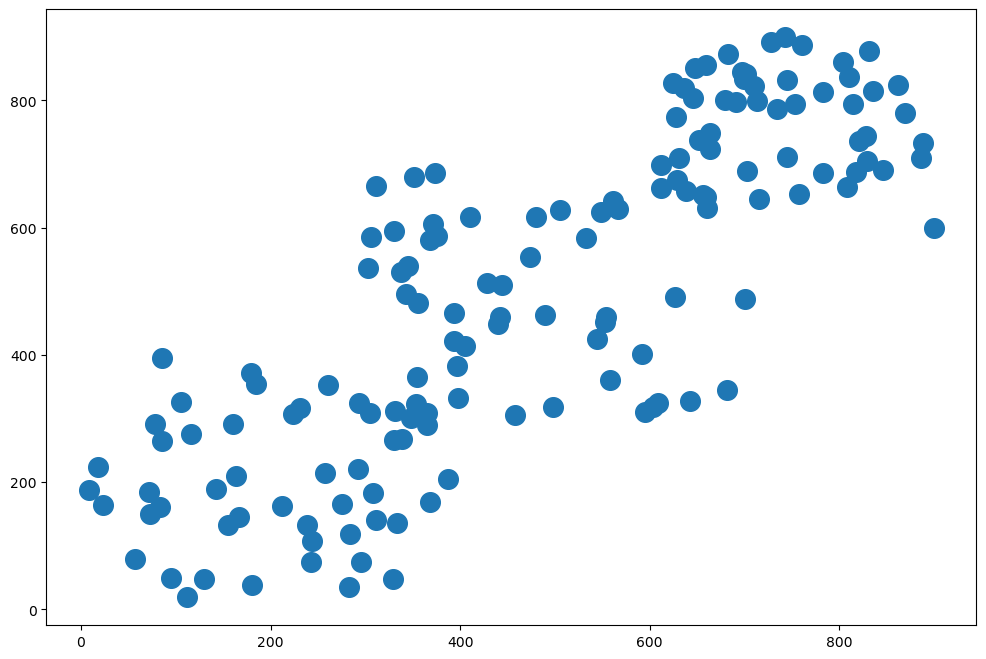

In [7]:
# Visualize the generated data
fix, ax = plt.subplots(figsize=(12, 8))
plt.scatter(data[:,0], data[:,1], s=200)

# Note the resmblence of clusters (created intentionally above)

In [8]:
# Assign labels to all of the points (each cluster has different label)

labels_1 = np.array([0 for i in range(50)])

labels_2 = np.array([1 for i in range(50)])

labels_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)

In [9]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# Convert into dataframe so it's easier to work with

df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})

df.shape

(150, 3)

In [19]:
df.sample(10)

,data_x,data_y,labels
10,116.0,275.0,0
17,365.0,309.0,0
58,603.0,318.0,1
146,821.0,736.0,2
51,351.0,680.0,1
57,338.0,530.0,1
75,595.0,310.0,1
108,728.0,891.0,2
60,627.0,491.0,1
110,888.0,733.0,2


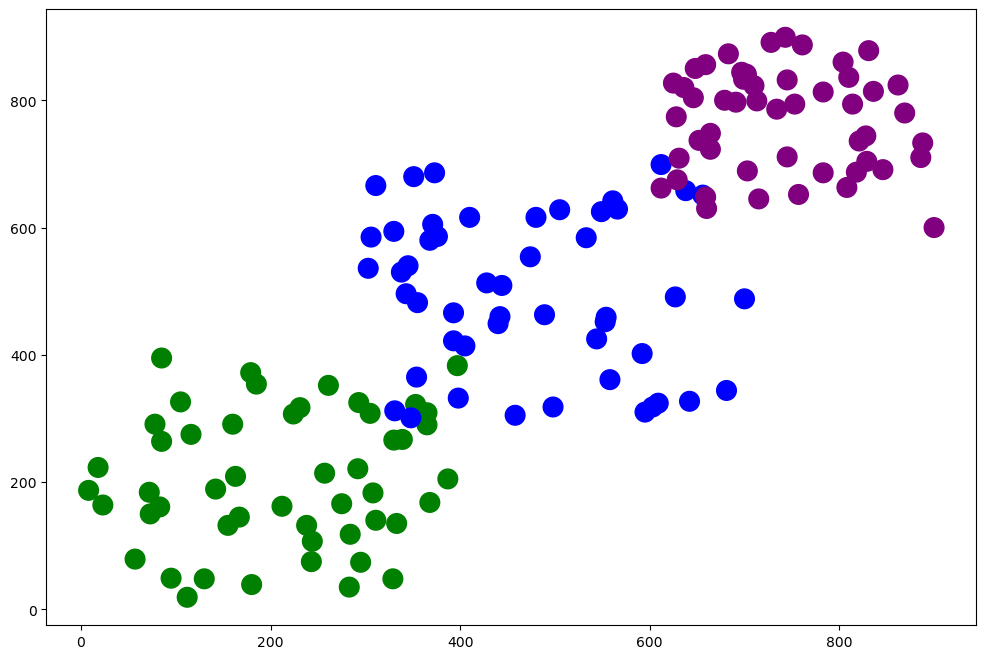

In [11]:
# Visualize the same data using colors

colors = ['green','blue','purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors))

In [12]:
# Instantiate KMeans estimator with 3 clusters (always need to set number of cluster up front)
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [27]:
# The labels assigned by the model to each data point
print('Number of labels: ', len(kmeans_model.labels_))
kmeans_model.labels_

# Note the labels won't necessarily be in order to how we manually labelled and it doesn't matter

Number of labels:  150


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [14]:
# Print the centroids (set of coordinates) for each cluster
centroids = kmeans_model.cluster_centers_

centroids

array([[464.02173913, 490.43478261],
       [213.23529412, 204.01960784],
       [733.83018868, 762.64150943]])

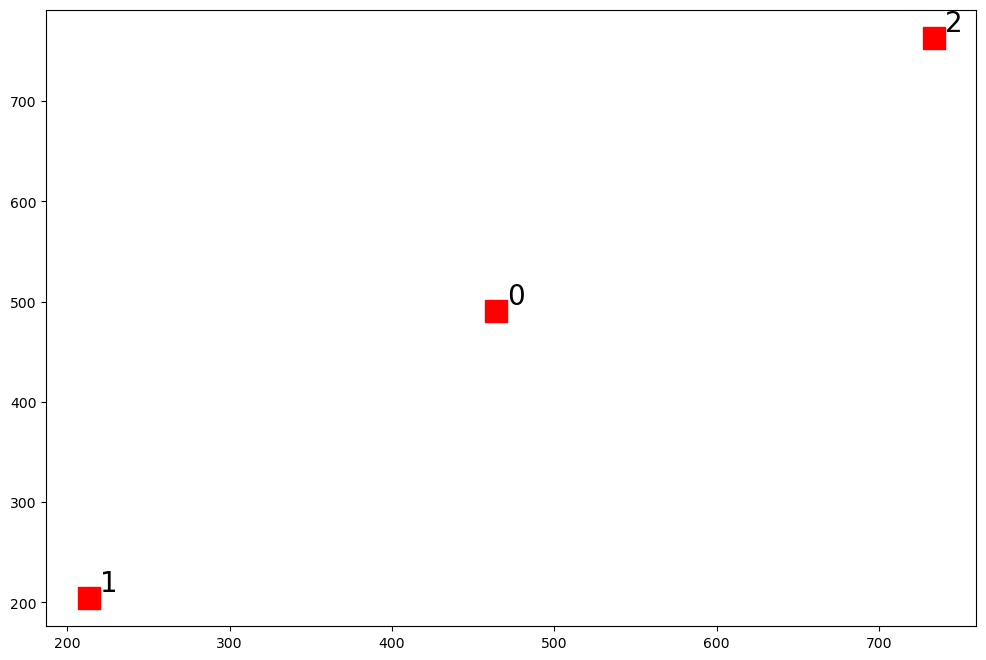

In [28]:
# Plot the centroids

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

# Here you can see the difference in label order (but there isn't an actual order so it does not matter) 
# What matters is that there are 3 distinct and labelled clusters, the label itself is arbitrary

### Evaluating K-means Clustering

In [29]:
# Print the model metrics
# Note that each score requires the manually provided labels aside from the Silhouette score
# Note again for labelled data, it isn't the actual names that matter, just that the points are properly grouped

# Clustering satisfies homogeneity if all of its clusters contain only points which are members of a single class
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))

# Clustering satisfies completeness if all the points that are members of the same class belong to the same cluster
print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))

# Harmonic mean of homogeneity and completeness
print("v_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))

# Similarity measure adjusted for chance, 0 = random, 1 = identical
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))

# Do changes in one variable affect another, or is a matter of chance? 0 = random, 1 = identical
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels,  kmeans_model.labels_))

# Score between -1 and 1, without using labels measures a point's similarity to own cluster and dissimilar to others
print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.8496054520433153
Completeness_score:  0.8509616469231334
v_measure_score:  0.8502830087034594
Adjusted_rand_score:  0.8839455022204461
Adjusted_mutual_info_score:  0.8484076652041024
Silhouette_score:  0.518022781479483


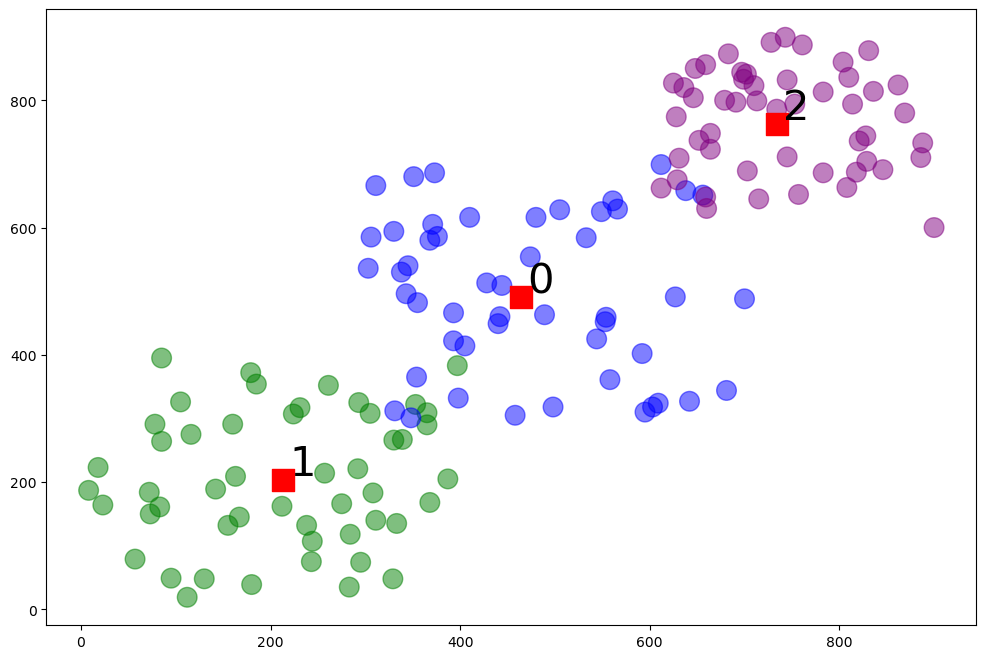

In [30]:
# Visualize the clusters along with their centroids

colors = ['green','blue','purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [34]:
# Use the model for prediction

data_test = np.array([
    [442., 621.],
    [50., 153.],
    [333., 373.],
    [835., 816.]
])

label_pred = kmeans_model.predict(data_test)

label_pred

array([0, 1, 0, 2], dtype=int32)

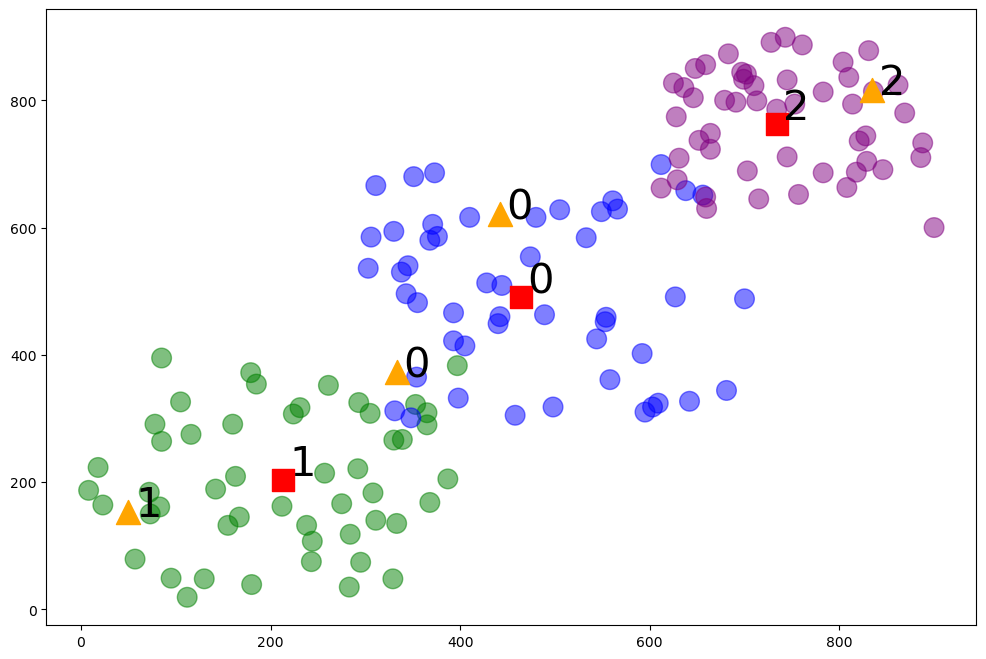

In [35]:
# Visualize the predictions against original data points

colors = ['green','blue','purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

# Plot the predicted/test data points with an orange triangle
plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')

for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize=30)
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)